In [23]:
#Observations
#1. Temperatures are higher in cities close to the equator.
#2. Cloudiness % has no correlation to proximity to the equator.
#3. Windspeed (mph) is higher north of the equator.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import openweathermapy as ow
from citipy import citipy
import requests as req
import pandas as pd

In [2]:
api_key = "0ab81223680991db65d9f94f266e6ae0"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = url + "appid=" + api_key + "&units=" + units + "&q="

In [3]:
# Select random coodindates and unique cities
lat = []
lon = []
for x in range(1500):
    lat.append(np.random.uniform(-90, 90,1))
    lon.append(np.random.uniform(-180, 180,1))
coordinates = list(zip(lat,lon))
    
cities = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    city = citipy.nearest_city(lat, lon)
    cities.append(city.city_name)
    
cities = list(set(cities))

In [4]:
weather_data = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = req.get(query_url + city).json()
    weather_data.append(response)

In [5]:
# Stores city data
name = []
date = []
temp = []
humidity = []
windspeed = []
cloudiness = []
latitude = []
longitude = []
country = []

for city in weather_data:
    try:
        name.append(city['name'])
        date.append(city['dt'])
        temp.append(city['main']['temp_max'])
        humidity.append(city['main']['humidity'])
        windspeed.append(city['wind']['speed'])
        cloudiness.append(city['clouds']['all'])
        latitude.append(city['coord']['lat'])
        longitude.append(city['coord']['lon'])
        country.append(city['sys']['country'])
    except:
            
        continue

In [20]:
# Display the City Data Frame 
citydata = {"City": name, "Cloudiness":cloudiness, "Country": country, "Date": date,"Humidity": humidity, "Lat": latitude,
           "Lng": longitude, "Max Temp": temp, "Wind Speed": windspeed} 
citydata = pd.DataFrame(citydata)
citydata.to_csv('City Data.csv')
citydata.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bria,8,CF,1515292252,63,6.54,21.99,56.17,6.87
1,Vaini,0,IN,1515292253,78,15.34,74.49,66.61,2.62
2,Belyy Yar,75,RU,1515290400,77,53.60,91.39,-2.21,1.50
3,Pisco,0,PE,1515290400,83,-13.71,-76.20,69.80,13.87
4,Basoko,88,CD,1515292255,58,1.23,23.61,79.75,5.75


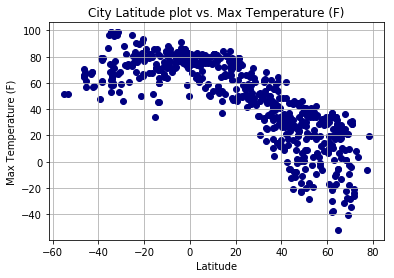

In [21]:
# Temperature (F) vs. Latitude plot
plt.scatter(citydata["Lat"], citydata["Max Temp"], marker="o", color="navy")

# Incorporate the other graph properties
plt.title("City Latitude plot vs. Max Temperature (F)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("MaxTemperatureLatitude.png")

# Show plot
plt.show()


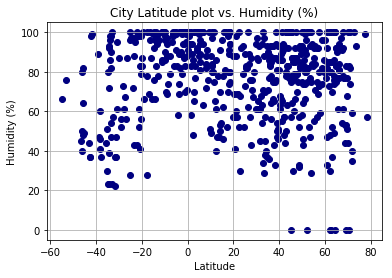

In [19]:
# Humidity (%) vs. Latitude plot
plt.scatter(citydata["Lat"], citydata["Humidity"], marker="o", color="navy")

# Incorporate the other graph properties
plt.title("City Latitude plot vs. Humidity (%)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityLatitude.png")

# Show plot
plt.show()

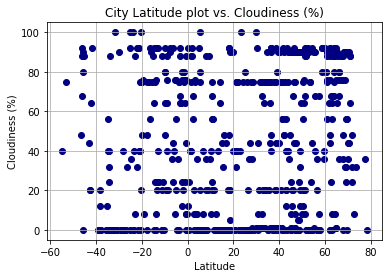

In [10]:
# Cloudiness (%) vs. Latitude
plt.scatter(citydata["Lat"], citydata["Cloudiness"], marker="o", color="navy")

# Incorporate the other graph properties
plt.title("City Latitude plot vs. Cloudiness (%)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessLatitude.png")

# Show plot
plt.show()

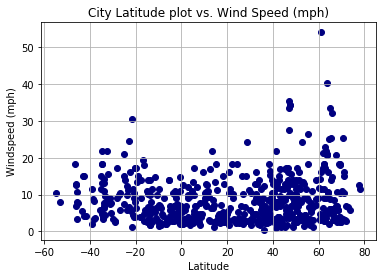

In [11]:
# Wind Speed (mph) vs. Latitude plot
plt.scatter(citydata["Lat"], citydata["Wind Speed"], marker="o", color="navy")

# Incorporate the other graph properties
plt.title("City Latitude plot vs. Wind Speed (mph)")
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedLatitude.png")

# Show plot
plt.show()